In [1]:
import numpy as np
import math
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import torch
from torch import nn
from IPython import display
import cv2
import random
from sklearn.model_selection import train_test_split

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
seed = 12345
random.seed(seed)
torch.manual_seed(seed)


In [4]:
import numpy as np
import math
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt


Xp = np.genfromtxt("X.csv", delimiter = ",")
y = np.genfromtxt("y.csv", delimiter = ",")
y[0:500] = 0
X = np.zeros((5000,400))
X = Xp
X = normalize(X)
"""X[:,1] = 1
X[:,1:] = Xp"""

print(X.shape)
print(y.shape)
Xtrain, Xtest, ytrain, ytest = train_test_split(X ,y , test_size = 0.25, random_state = 42)

(5000, 400)
(5000,)


In [5]:

Xtrain = torch.tensor(Xtrain).to(device)
ytrain = torch.tensor(ytrain).to(device)
Xtest = torch.tensor(Xtest).to(device)
ytest = torch.tensor(ytest).to(device)

# y = nn.functional.one_hot(y.long())
#print(y.size())
y[20]

0.0

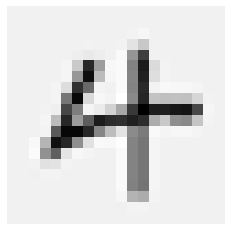

In [6]:
index = 20
img = np.reshape(Xtrain[index,:], (20,20))
img = np.rot90(img, -1)
img = np.flip(img,1)
plt.imshow(img, cmap = "binary")
plt.axis("off")
plt.show()

In [28]:
learning_rate = 1e-2
lambda_l2 = 1e-4

In [41]:
model = nn.Sequential(nn.Linear(400, 20), nn.ReLU(),
                      nn.Linear(20, 10), nn.Softmax())

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = lambda_l2)

epochs = 2000

for i in range(epochs):
    y_pred = model(Xtrain.float())
    loss = criterion(y_pred, ytrain.long())
    score, predicted = torch.max(y_pred, 1) 
    acc = (ytrain == predicted).sum().float() / len(ytrain)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (i, loss.item(), acc))
    display.clear_output(wait=True)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

[EPOCH]: 1999, [LOSS]: 1.492849, [ACCURACY]: 0.986


In [42]:
y_t = model(Xtest.float())
score, predicted = torch.max(y_t, 1) 
acc = (ytest == predicted).sum().float() / len(ytest)
print(f"Accuracy on test set is {acc}")

Accuracy on test set is 0.9351999759674072


tensor(3)
tensor(1.0000, grad_fn=<MaxBackward1>)


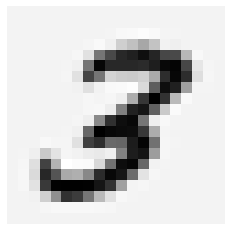

tensor(3., dtype=torch.float64)


In [244]:
index = 18
arg = torch.argmax(model(Xtest[index,:].float()))
print(arg)
print(torch.max(model(Xtest[index,:].float())))
img = np.reshape(Xtest[index,:], (20,20))
img = np.rot90(img, -1)
img = np.flip(img,1)
plt.imshow(img, cmap = "binary")
plt.axis("off")
plt.show()
print(ytest[index])

tensor(3)

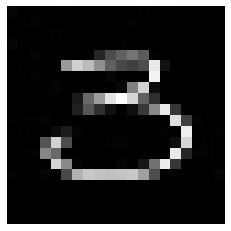

In [247]:
img = cv2.imread("a3.jpg",0)
img = cv2.bitwise_not(img)
#img = normalize(img)
img = torch.tensor(img)
img = torch.reshape(img,(20,20))
plt.imshow(img, cmap = "binary")
plt.axis("off")
img = torch.reshape(img,(1,400))
arg = torch.argmax(model(img.float()))
arg

Accuracy on test set is 0.9296000003814697
